<a href="https://colab.research.google.com/github/ahmadfahriramadhani/Pengolahan-Citra-Digital-F-/blob/main/frequency_domain(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

Resolusi gambar 1: 220x425 piksel


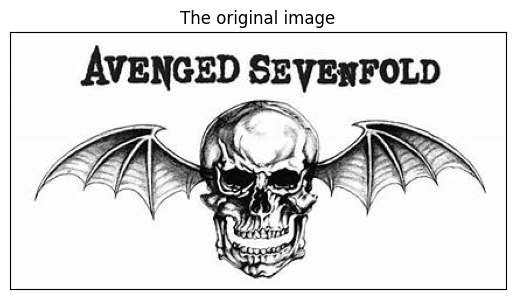

In [9]:
urllib.request.urlretrieve(
'https://tse3.mm.bing.net/th?id=OIP.UT8gCLAG4ppeNTCwd7GhqgHaD1&pid=Api&P=0&h=220', # link from google image
"gambar_1.png")

# load image
image_1 = cv2.imread('gambar_1.png',cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE


# Dapatkan resolusi gambar dalam piksel
width, height, = image_1.shape
print(f"Resolusi gambar 1: {width}x{height} piksel")

plt.title('The original image')
plt.imshow(image_1, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()


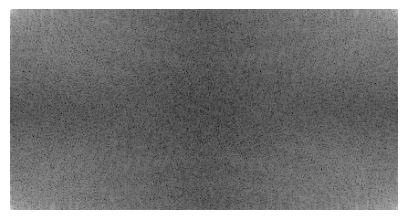

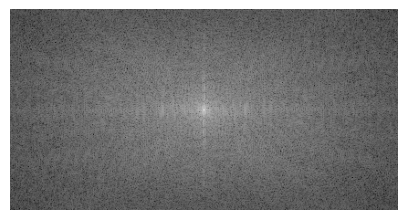

In [10]:
F = np.fft.fft2(image_1)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

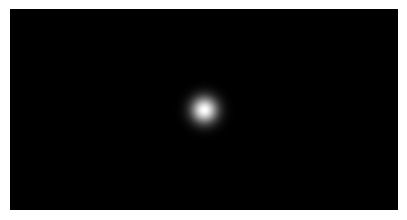

In [11]:
# Create Gaussin Filter: Low Pass Filter
M,N = image_1.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

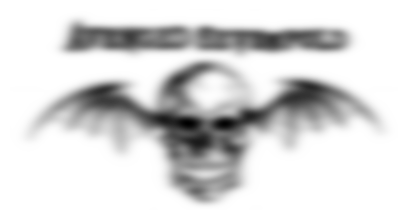

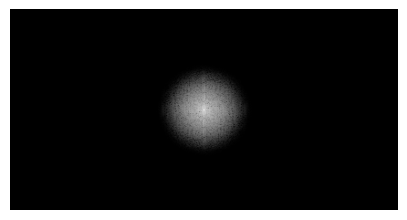

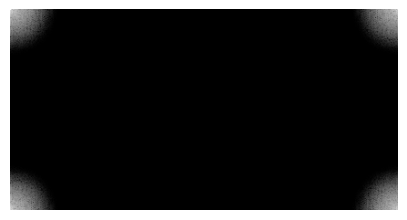

In [12]:
# Image Filters
Gshift = Fshift * H  # Apply filter directly to the 2D array

G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

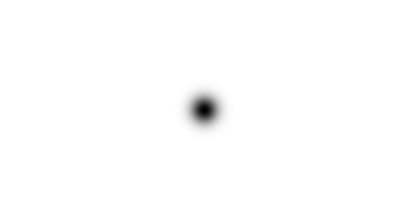

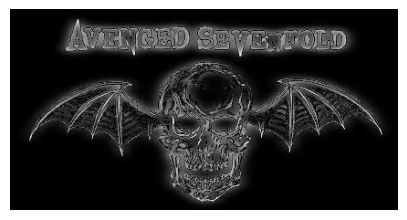

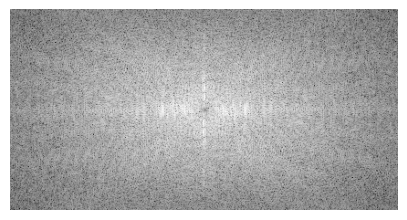

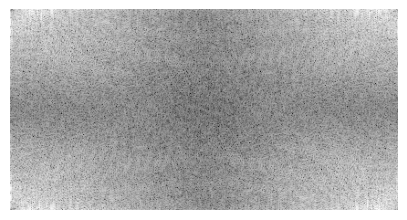

In [13]:
# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

# Image Filters
# Instead of expanding HPF, directly apply it to Fshift,
# as both are 2D arrays representing grayscale data in frequency domain.
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()